You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.
Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
Use SQLAlchemy create_engine to connect to your sqlite database.
Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd 
import numpy as np

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [5]:
# Get a list of column names and types
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station VARCHAR
date VARCHAR
prcp INTEGER
tobs INTEGER


In [6]:
# Get a list of column names and types
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
engine.execute('Select * from measurements limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0, 63),
 (3, 'USC00519397', '2010-01-03', 0, 74),
 (4, 'USC00519397', '2010-01-04', 0, 76),
 (5, 'USC00519397', '2010-01-06', 0, 73)]

In [8]:
engine.execute('Select * from stations limit 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [10]:
session = Session(engine)

In [11]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [12]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [13]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# 1/1/2010 - 8/23/2017

session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-02'

Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.
Select only the date and prcp values.
Load the query results into a Pandas DataFrame and set the index to the date column.
Plot the results using the DataFrame plot method.
Use Pandas to print the summary statistics for the precipitation data.

In [15]:
sel = [Measurement.date, Measurement.prcp, Measurement.station, Station.name, Station.station]
select_station = session.query(*sel).filter(Measurement.station == Station.station).\
                filter(Station.name.like("%Honolulu%")).\
                limit(10).all()

for record in select_station:
    (measurement_date, measurement_prcp, measurement_station, station_name, station_station) = record
    print(
        f"This is my data '{measurement_date} {measurement_prcp} {measurement_station} {station_name} {station_station}'")

This is my data '2010-01-01 0.05 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-02 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-03 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-04 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-05 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-06 0.08 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-07 0.04 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-08 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-09 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'
This is my data '2010-01-10 0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US USC00511918'


In [16]:
sel = [Measurement.date, Measurement.prcp]
precipitation = session.query(*sel).filter(Measurement.station == Station.station).\
                filter(Station.name.like("%Honolulu%")).\
                all()

for record in precipitation:
    (measurement_date, measurement_prcp) = record
    print(
        f"This is my data '{measurement_date} {measurement_prcp}'")


precipitation_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all())

precipitation_df.set_index('date')

precipitation_df.head()

This is my data '2010-01-01 0.05'
This is my data '2010-01-02 0'
This is my data '2010-01-03 0'
This is my data '2010-01-04 0'
This is my data '2010-01-05 0'
This is my data '2010-01-06 0.08'
This is my data '2010-01-07 0.04'
This is my data '2010-01-08 0'
This is my data '2010-01-09 0'
This is my data '2010-01-10 0'
This is my data '2010-01-11 0.05'
This is my data '2010-01-12 0'
This is my data '2010-01-13 0'
This is my data '2010-01-14 0'
This is my data '2010-01-15 0'
This is my data '2010-01-16 0'
This is my data '2010-01-18 0'
This is my data '2010-01-19 0'
This is my data '2010-01-20 0'
This is my data '2010-01-21 0'
This is my data '2010-01-22 0'
This is my data '2010-01-23 0'
This is my data '2010-01-24 0'
This is my data '2010-01-25 0'
This is my data '2010-01-26 0.03'
This is my data '2010-01-27 0.25'
This is my data '2010-01-29 0'
This is my data '2010-01-30 0.4'
This is my data '2010-01-31 0.01'
This is my data '2010-02-01 0'
This is my data '2010-02-02 0'
This is my data 

This is my data '2015-03-08 0'
This is my data '2015-03-09 0'
This is my data '2015-03-11 0'
This is my data '2015-03-12 0.02'
This is my data '2015-03-13 0'
This is my data '2015-03-14 0'
This is my data '2015-03-15 0'
This is my data '2015-03-17 0'
This is my data '2015-03-18 0'
This is my data '2015-03-20 0'
This is my data '2015-04-02 0'
This is my data '2015-04-03 0'
This is my data '2015-04-06 0'
This is my data '2015-04-07 0'
This is my data '2015-04-08 0'
This is my data '2015-04-09 0'
This is my data '2015-04-10 0'
This is my data '2015-04-13 0'
This is my data '2015-04-14 0.1'
This is my data '2015-04-15 0'
This is my data '2015-04-16 0'
This is my data '2015-04-17 0'
This is my data '2015-04-20 0'
This is my data '2015-04-21 0'
This is my data '2015-04-22 0.05'
This is my data '2015-04-23 0'
This is my data '2015-04-24 0'
This is my data '2015-04-27 0'
This is my data '2015-04-29 0'
This is my data '2015-04-30 0'
This is my data '2015-05-01 0'
This is my data '2015-05-04 0'


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02


In [17]:
precipitation_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02


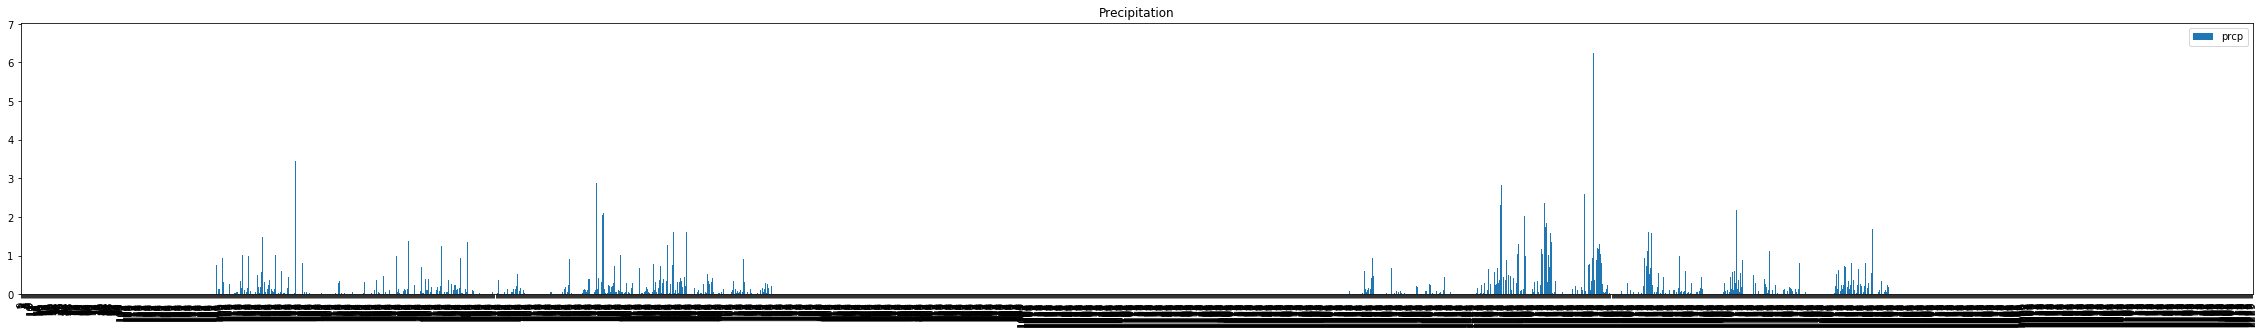

In [18]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

multi_plot = precipitation_df.plot(kind = 'bar', figsize=(40,5))


#fig, ax = plt.subplots()
#ax.plot(multi_plot.date, multi_plot.prcp)


# format the ticks
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsFmt)
#ax.xaxis.set_minor_locator(months)


#multi_plot.set_xticklabels(precipitation_df['date'], rotation=45)
plt.title("Precipitation")
plt.show()


In [19]:
precipitation_df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


Station Analysis


Design a query to calculate the total number of stations.

Design a query to find the most active stations.


List the stations and observation counts in descending order
Which station has the highest number of observations?



Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [20]:
session.query(Station.station).\
        group_by(Station.station).\
        count()

9

In [22]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [27]:
sel = [Station.name, Station.station, Measurement.tobs]
active_stations = session.query(*sel).filter(Measurement.station == Station.station).\
                                all()

for record in active_stations:
    (station_name, station_station, measurement_tobs) = record
    print(
        f"This is my data '{station_name} {station_station} {measurement_tobs}'")



#precipitation_df.set_index('date')

#precipitation_df.head()
#                all()

#for record in active_stations:
#    (station_name, measurement_prcp) = record
#    print(
#        f"This is my data '{station_name} {measurement_prcp}'")


#precipitation_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
#    filter(Measurement.date >= '2016-08-23').\
#    filter(Measurement.date <= '2017-08-23').\
#    order_by(Measurement.date).all())

#precipitation_df.set_index('date')

#precipitation_df.head()

This is my data 'WAIKIKI 717.2, HI US USC00519397 56'
This is my data 'WAIKIKI 717.2, HI US USC00519397 58'
This is my data 'WAIKIKI 717.2, HI US USC00519397 58'
This is my data 'WAIKIKI 717.2, HI US USC00519397 58'
This is my data 'WAIKIKI 717.2, HI US USC00519397 58'
This is my data 'WAIKIKI 717.2, HI US USC00519397 58'
This is my data 'WAIKIKI 717.2, HI US USC00519397 58'
This is my data 'WAIKIKI 717.2, HI US USC00519397 59'
This is my data 'WAIKIKI 717.2, HI US USC00519397 60'
This is my data 'WAIKIKI 717.2, HI US USC00519397 60'
This is my data 'WAIKIKI 717.2, HI US USC00519397 60'
This is my data 'WAIKIKI 717.2, HI US USC00519397 60'
This is my data 'WAIKIKI 717.2, HI US USC00519397 61'
This is my data 'WAIKIKI 717.2, HI US USC00519397 61'
This is my data 'WAIKIKI 717.2, HI US USC00519397 61'
This is my data 'WAIKIKI 717.2, HI US USC00519397 61'
This is my data 'WAIKIKI 717.2, HI US USC00519397 61'
This is my data 'WAIKIKI 717.2, HI US USC00519397 61'
This is my data 'WAIKIKI 717

This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717.2, HI US USC00519397 78'
This is my data 'WAIKIKI 717

This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838.1, HI US USC00513117 74'
This is my data 'KANEOHE 838

This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514830 77'
This is my data 'KUALOA RANCH HEADQUARTERS 886.9, HI US USC00514

This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 59'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 60'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 61'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 62'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 63'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 63'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 63'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 63'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 63'
This is my data 'UPPER WAHIAWA 874.3, HI US USC00518838 64'
This is my data 'UPPER WAHIAWA 874.3, HI

This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI US USC00519523 77'
This is my data 'WAIMANALO EXPERIMENTAL FARM, HI

This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC00519281 72'
This is my data 'WAIHEE 837.5, HI US USC005192

This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918 72'
This is my data 'HONOLULU OBSERVATORY 702.2, HI US USC00511918

This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is my data 'MANOA LYON ARBO 785.2, HI US USC00516128 72'
This is 

In [25]:


tobs_grp = session.query(Station.name, Station.station, func.count(Measurement.tobs)).\
        filter(Station.station == Measurement.station).\
        group_by(Station.name, Station.station).\
        order_by(func.count(Measurement.tobs).desc()).all()
        
print(tobs_grp)

[('WAIHEE 837.5, HI US', 'USC00519281', 2772), ('WAIKIKI 717.2, HI US', 'USC00519397', 2724), ('KANEOHE 838.1, HI US', 'USC00513117', 2709), ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669), ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202), ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979), ('PEARL CITY, HI US', 'USC00517948', 1372), ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]


In [26]:
tobs_highest = session.query(Station.name, Station.station, func.count(Measurement.tobs)).\
        filter(Station.station == Measurement.station).\
        group_by(Station.name, Station.station).\
        order_by(func.count(Measurement.tobs).desc()).first()
        
print(tobs_highest)

('WAIHEE 837.5, HI US', 'USC00519281', 2772)


In [82]:
sel2 = [Measurement.date, Measurement.tobs]
tobs_qry = session.query(*sel2).filter(Measurement.station == Station.station).\
                filter(Station.station == ("USC00519281")).\
                all()
#print(tobs_qry)
#for record in tobs_qry:
#    (measurement_date, measurement_tobs) = record
#    print(
#        f"This is my data '{measurement_date} {measurement_tobs}'")

tobs_2_df = pd.DataFrame(session.query(func.count(Measurement.tobs)).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    #group_by(Measurement.tobs).\
    order_by(Measurement.date).all())

tobs_2_df.set_index('tobs')
tobs_2_df.head()

NameError: name 'countMeasurement' is not defined

In [78]:
tobs_grp = session.query(Measurement.tobs, func.count(Measurement.tobs)).group_by(Measurement.tobs)
print(tobs_grp)

#for record in tobs_grp:
#    (measurement_tobs) = record
#    print(
#        f"This is my data '{measurement_tobs}'")



tobs_grp_df = pd.DataFrame(session.query(Measurement.tobs, func.count(Measurement.tobs)).group_by(Measurement.tobs))


SELECT measurements.tobs AS measurements_tobs, count(measurements.tobs) AS count_1 
FROM measurements GROUP BY measurements.tobs


ValueError: DataFrame constructor not properly called!

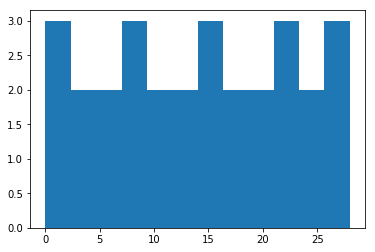

In [67]:
bins= 12
plt.hist(tobs_2_df.index, bins=bins)
#plt.xticks(bins)

plt.show()

In [ ]:
Temperature Analysis


Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).